## Relationship Between Fuel Production and Consumption

## Objectives

1. To assess the sustainability and balance of fuel production and consumption within a country.

2. To evaluate the economical impact of fuel production.

3. To compare the price of fuel production and consumption.

4. To identify trends and patterns in per capita enery production and consumption.

5. To evaluate the average production and consumption of fuel throughout the years.



In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import preprocessing module
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

# Import classifier algorithm here
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Oversampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

%matplotlib inline


## Loading and Previewing Data

In [ ]:
data = pd.read_csv('Fuel production vs consumption.csv',encoding="latin-1")
data

,Year,Entity,Gas production(m³),Gas consumption(m³),Coal production(Ton),Coal consumption(Ton),Oil production(m³),Oil consumption(m³),Gas production per capita(m³),Gas consumption per capita(m³),Coal production per capita(Ton),Coal consumption per capita(Ton),Oil production per capita(m³),Oil consumption per capita(m³),Population
0,1980,Afghanistan,1.699000e+09,56640000.0,119000.0,119000.0,0.0,406500.0,127.2,4.241,0.00891,0.00891,0.0,0.03043,13360000.0
1,1981,Afghanistan,2.237000e+09,84960000.0,125000.0,125000.0,0.0,464600.0,169.9,6.450,0.00949,0.00949,0.0,0.03527,13170000.0
2,1982,Afghanistan,2.294000e+09,141600000.0,145000.0,145000.0,0.0,452900.0,178.1,10.990,0.01126,0.01126,0.0,0.03516,12880000.0
3,1983,Afghanistan,2.407000e+09,141600000.0,145000.0,145000.0,0.0,638800.0,192.0,11.290,0.01157,0.01157,0.0,0.05095,12540000.0
4,1984,Afghanistan,2.407000e+09,141600000.0,148000.0,148000.0,0.0,638800.0,197.2,11.600,0.01213,0.01213,0.0,0.05234,12200000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9232,2017,Zimbabwe,0.000000e+00,0.0,2928000.0,2559000.0,0.0,1427000.0,0.0,0.000,0.20570,0.17980,0.0,0.10030,14240000.0
9233,2018,Zimbabwe,0.000000e+00,0.0,3348000.0,2069000.0,0.0,1771000.0,0.0,0.000,0.23180,0.14330,0.0,0.12260,14440000.0
9234,2019,Zimbabwe,0.000000e+00,0.0,3076000.0,1826000.0,0.0,1583000.0,0.0,0.000,0.21010,0.12470,0.0,0.10810,14650000.0
9235,2020,Zimbabwe,0.000000e+00,0.0,3659000.0,3469000.0,0.0,NaN,0.0,0.000,0.24620,0.23340,0.0,NaN,14860000.0


In [ ]:
def null_values(data): 
    missing_values = data.isnull().sum()

    return missing_values

In [ ]:
null_values(data)

Year                                   0
Entity                                 0
Gas production(m³)                   529
Gas consumption(m³)                  548
Coal production(Ton)                 420
Coal consumption(Ton)                420
Oil production(m³)                   445
Oil consumption(m³)                  682
Gas production per capita(m³)       1548
Gas consumption per capita(m³)      1566
Coal production per capita(Ton)     1480
Coal consumption per capita(Ton)    1480
Oil production per capita(m³)       1417
Oil consumption per capita(m³)      1636
Population                          1105
dtype: int64

In [ ]:
# Visualization of Outliers

outlier_column = ['Gas production(m³)', 'Gas consumption(m³)','Coal production(Ton)', 'Coal consumption(Ton)',
    'Oil production(m³)', 'Oil consumption(m³)','Gas production per capita(m³)', 'Gas consumption per capita(m³)',
    'Coal production per capita(Ton)', 'Coal consumption per capita(Ton)',
    'Oil production per capita(m³)', 'Oil consumption per capita(m³)',
    'Population'
]

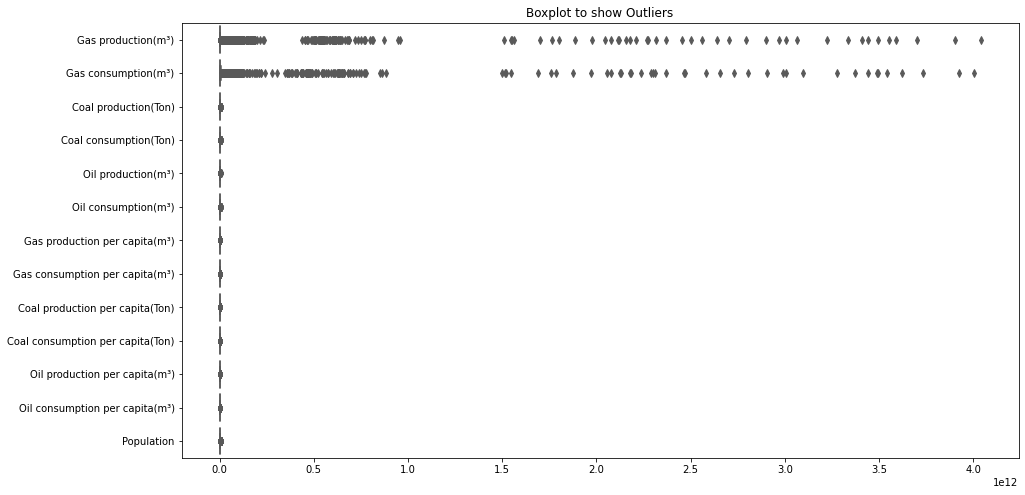

In [46]:
# Boxplot to show Outliers
selected_column =data[outlier_column]

plt.figure(figsize=(15,8))

sns.boxplot(data=selected_column,palette="Set2", orient="h")

plt.title("Boxplot to show Outliers")
plt.show()



## Data Cleaning

In [47]:
# Handling Outliers

outlier_columns = ['Gas production(m³)', 'Gas consumption(m³)','Coal production(Ton)', 'Coal consumption(Ton)',
    'Oil production(m³)', 'Oil consumption(m³)','Gas production per capita(m³)', 'Gas consumption per capita(m³)',
    'Coal production per capita(Ton)', 'Coal consumption per capita(Ton)',
    'Oil production per capita(m³)', 'Oil consumption per capita(m³)','Population'
]


In [48]:
mean_columns = ['Gas production(m³)', 'Gas consumption(m³)','Coal production(Ton)', 'Coal consumption(Ton)',
    'Oil production(m³)', 'Oil consumption(m³)','Gas production per capita(m³)', 'Gas consumption per capita(m³)',
    'Coal production per capita(Ton)', 'Coal consumption per capita(Ton)',
    'Oil production per capita(m³)', 'Oil consumption per capita(m³)','Population']

data[mean_columns] = data[mean_columns].fillna(data[mean_columns].mean())

In [49]:
null_values(data)

Year                                0
Entity                              0
Gas production(m³)                  0
Gas consumption(m³)                 0
Coal production(Ton)                0
Coal consumption(Ton)               0
Oil production(m³)                  0
Oil consumption(m³)                 0
Gas production per capita(m³)       0
Gas consumption per capita(m³)      0
Coal production per capita(Ton)     0
Coal consumption per capita(Ton)    0
Oil production per capita(m³)       0
Oil consumption per capita(m³)      0
Population                          0
dtype: int64

In [69]:
# Replace zeros with NaN
data.replace(0, pd.NA, inplace=True)

# Fill NaN values with the median of each column
data_filled_median = data.fillna(data.median())

# Fill NaN values with the mean of each column
data_filled_mean = data.fillna(data.mean())

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9237 entries, 0 to 9236
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              9237 non-null   int64  
 1   Entity                            9237 non-null   object 
 2   Gas production(m³)                3962 non-null   float64
 3   Gas consumption(m³)               4533 non-null   float64
 4   Coal production(Ton)              3160 non-null   float64
 5   Coal consumption(Ton)             5105 non-null   float64
 6   Oil production(m³)                4303 non-null   float64
 7   Oil consumption(m³)               9217 non-null   float64
 8   Gas production per capita(m³)     4908 non-null   float64
 9   Gas consumption per capita(m³)    5464 non-null   float64
 10  Coal production per capita(Ton)   4134 non-null   float64
 11  Coal consumption per capita(Ton)  6012 non-null   float64
 12  Oil pr

# Exploratory Data Analysis

In [71]:
# Checking for statistical information on the dataset
data.describe()

,Year,Gas production(m³),Gas consumption(m³),Coal production(Ton),Coal consumption(Ton),Oil production(m³),Oil consumption(m³),Gas production per capita(m³),Gas consumption per capita(m³),Coal production per capita(Ton),Coal consumption per capita(Ton),Oil production per capita(m³),Oil consumption per capita(m³),Population
count,9237.000000,3.962000e+03,4.533000e+03,3.160000e+03,5.105000e+03,4.303000e+03,9.217000e+03,4.908000e+03,5464.000000,4134.000000,6.012000e+03,5195.000000,9234.000000,9.237000e+03
mean,2000.443434,5.555777e+10,4.875089e+10,1.538078e+08,9.437689e+07,8.889528e+07,4.560632e+07,1.813466e+03,1035.649432,0.947807,6.674254e-01,4.293615,1.392948,6.719422e+07
std,12.439275,2.780482e+11,2.595850e+11,7.168591e+08,5.681887e+08,4.096634e+08,3.148986e+08,5.564052e+03,2285.787325,2.042371,1.099277e+00,13.611167,3.861482,4.418989e+08
min,1973.000000,5.030000e-08,5.664000e+04,5.000000e+01,1.100000e-01,2.904000e+02,1.161000e+03,2.280000e-15,0.004381,0.000023,1.740000e-08,0.000066,0.002854,9.590000e+02
25%,1990.000000,7.363000e+08,1.430000e+09,5.983250e+05,1.150000e+05,1.061500e+06,3.800000e+05,6.357750e+01,168.500000,0.077200,2.625500e-02,0.110400,0.205200,2.021000e+06
50%,2001.000000,7.017000e+09,6.845000e+09,7.029000e+06,2.382000e+06,9.001000e+06,2.105000e+06,9.635696e+02,612.621901,0.424189,4.344009e-01,1.548000,0.934750,8.964000e+06
75%,2011.000000,2.383023e+10,2.392419e+10,5.261801e+07,3.582000e+07,4.141132e+07,1.731000e+07,9.635696e+02,775.575000,0.525325,5.116500e-01,2.414781,1.392495,4.305000e+07
max,2021.000000,4.039000e+12,4.004000e+12,8.144000e+09,8.179000e+09,4.817000e+09,5.820000e+09,7.152000e+04,27160.000000,21.770000,7.093000e+00,233.000000,125.800000,7.786000e+09


In [67]:
data['Gas production(m³)'].min()

0.0

In [55]:
# # Plotting consumption per capita for coal, oil, and gas against population
# plt.figure(figsize=(15,8))

# sns.lineplot (x ='Population', y='Gas consumption per capita(m³)', data=data, palette='blue', label='Gas')
# sns.lineplot (x='Population', y='Coal consumption per capita(Ton)', data=data, palette='blue', label='Coal')
# sns.lineplot (x='Population', y='Oil consumption per capita(m³)', data=data, palette='blue', label='Oil')

# plt.title('Consumption per capita for coal, oil, and gas against population')
# plt.ylabel('consumption per capita')
# plt.xlabel('population')

# plt.legend()

# plt.show()

In [56]:
data.columns

Index(['Year', 'Entity', 'Gas production(m³)', 'Gas consumption(m³)',
       'Coal production(Ton)', 'Coal consumption(Ton)', 'Oil production(m³)',
       'Oil consumption(m³)', 'Gas production per capita(m³)',
       'Gas consumption per capita(m³)', 'Coal production per capita(Ton)',
       'Coal consumption per capita(Ton)', 'Oil production per capita(m³)',
       'Oil consumption per capita(m³)', 'Population'],
      dtype='object')

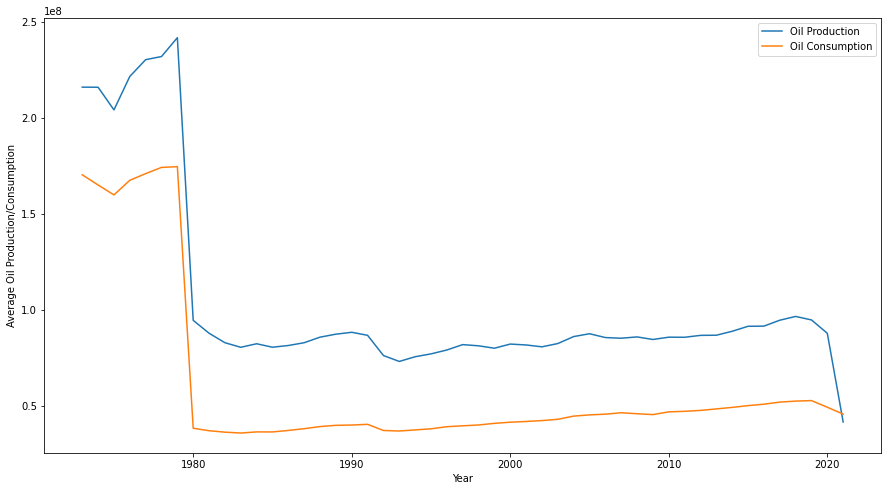

In [85]:
mean_oil_production = data.groupby('Year')[['Oil production(m³)', 'Oil consumption(m³)']].mean().reset_index()

plt.figure(figsize=(15, 8))
# Use Seaborn lineplot to visualize the data
sns.lineplot(x='Year', y='Oil production(m³)', data=mean_oil_production, label='Oil Production')
sns.lineplot(x='Year', y='Oil consumption(m³)', data=mean_oil_production, label='Oil Consumption')


plt.xlabel('Year')
plt.ylabel('Average Oil Production/Consumption')
plt.legend()
plt.show()

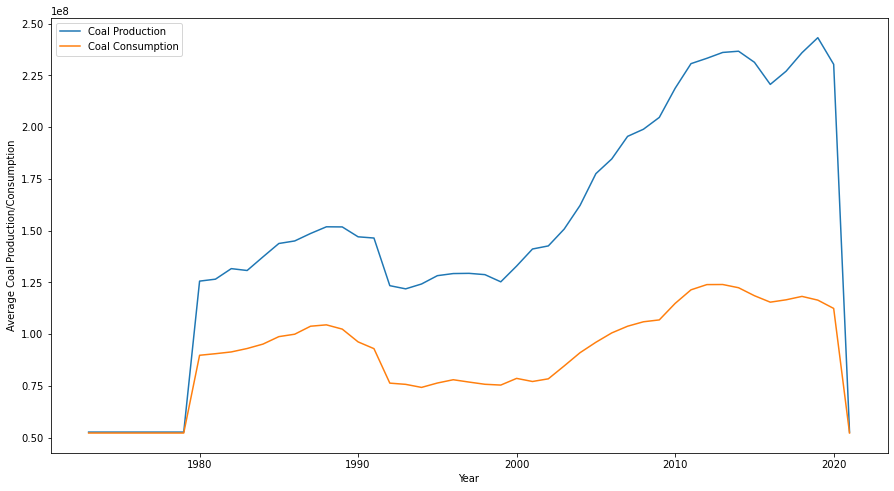

In [83]:
mean_coal_production = data.groupby('Year')[['Coal production(Ton)', 'Coal consumption(Ton)']].mean().reset_index()

plt.figure(figsize=(15, 8))
# Use Seaborn lineplot to visualize the data
sns.lineplot(x='Year', y='Coal production(Ton)', data=mean_coal_production, label='Coal Production')
sns.lineplot(x='Year', y='Coal consumption(Ton)', data=mean_coal_production, label='Coal Consumption')


plt.xlabel('Year')
plt.ylabel('Average Coal Production/Consumption')
plt.legend()
plt.show()

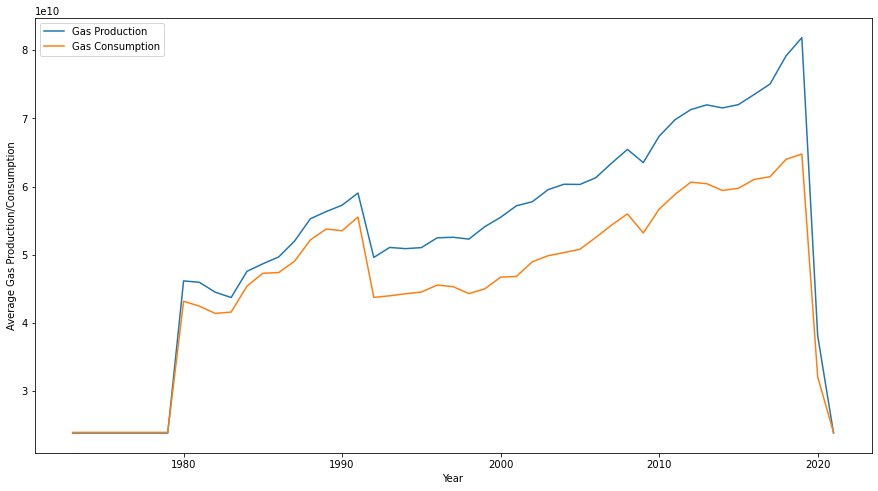

In [82]:
mean_gas_production = data.groupby('Year')[['Gas production(m³)', 'Gas consumption(m³)']].mean().reset_index()

plt.figure(figsize=(15, 8))
# Use Seaborn lineplot to visualize the data
sns.lineplot(x='Year', y='Gas production(m³)', data=mean_gas_production, label='Gas Production')
sns.lineplot(x='Year', y='Gas consumption(m³)', data=mean_gas_production, label='Gas Consumption')


plt.xlabel('Year')
plt.ylabel('Average Gas Production/Consumption')
plt.legend()
plt.show()